# Homework



In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text

In [16]:
# import wget

# url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
# wget.download(url)

In [17]:
!head housing.csv

In [18]:
df = pd.read_csv('housing.csv')
df.head()

"head" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
df.describe().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [21]:
df = df.fillna(0)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [23]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

In [24]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

## Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

Train a model with max_depth=1.


In [25]:
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [26]:
print(export_text(dt, feature_names = dv.get_feature_names_out()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



Which feature is used for splitting the data?

Answer: **ocean_proximity=INLAND**

## Question 2
Train a random forest model with these parameters:
* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)

In [27]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [28]:
rf_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rf_rmse.round(2)

0.25

## Question 3
Now let's experiment with the n_estimators parameter
* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.

In [29]:
scores = []

rf = RandomForestRegressor(n_estimators=0, random_state=1, warm_start = True)

for n in tqdm(range(10, 201, 10)):
    rf.n_estimators = n
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n, rmse))

  0%|          | 0/20 [00:00<?, ?it/s]

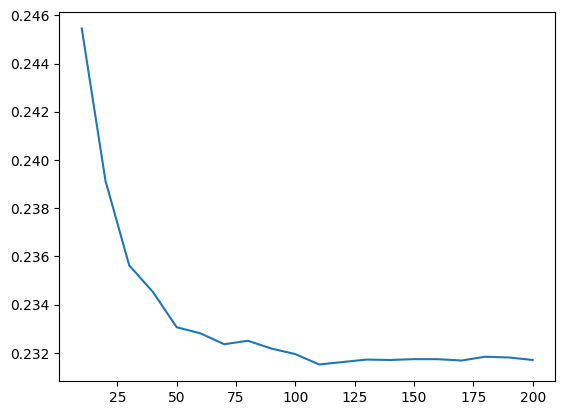

In [30]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "rmse"])
plt.plot(df_scores.n_estimators, df_scores.rmse);

After which value of n_estimators does RMSE stop improving?

Answer: **75**

## Question 4
Let's select the best `max_depth`:
* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [32]:
scores = []

for i in tqdm([10, 15, 20, 25]):

    rf = RandomForestRegressor(n_estimators=0, max_depth = i, random_state=1, warm_start = True)
    
    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((i, n, rmse))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

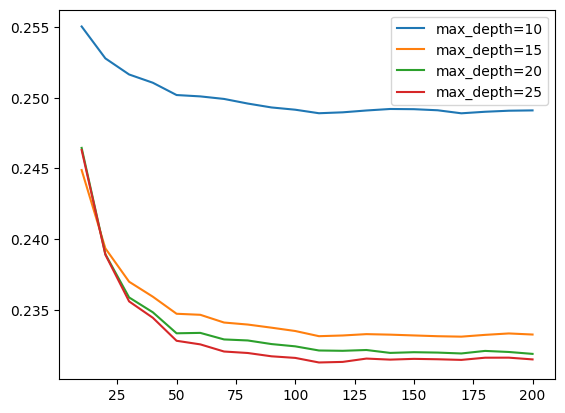

In [33]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimators", "rmse"])
for i in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth==i]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label = f"max_depth={i}");
plt.legend()

What's the best max_depth:

Answer: **25**

## Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_) field.

For this homework question, we'll find the most important feature:
* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)

* Get the feature importance information from this model

In [34]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20,
                           random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [36]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = rf.feature_importances_

In [37]:
df_importances.sort_values('importance', ascending = False)

,feature,importance
4,median_income,0.363080
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101310
3,longitude,0.096312
1,housing_median_age,0.033105
10,population,0.030960
12,total_rooms,0.020512
11,total_bedrooms,0.018634
0,households,0.017169
9,ocean_proximity=NEAR OCEAN,0.004243


What's the most important feature?

Answer: **`median_income`**

## Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:
* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:
```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```
Now change `eta` first to `0.1` and then to `0.01`

In [39]:
features = dv.get_feature_names_out()
features[5] = 'ocean_proximity=1H OCEAN'
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [40]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [41]:
xgb_params = {
  'eta': 0.3, 
  'max_depth': 6,
  'min_child_weight': 1,

  'objective': 'reg:squarederror',
  'nthread': 8,

  'seed': 1,
  'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

[0]	train-rmse:8.12733	val-rmse:8.13232
[5]	train-rmse:1.40154	val-rmse:1.40605
[10]	train-rmse:0.33762	val-rmse:0.35337
[15]	train-rmse:0.22493	val-rmse:0.25306
[20]	train-rmse:0.20596	val-rmse:0.24074
[25]	train-rmse:0.19729	val-rmse:0.23785
[30]	train-rmse:0.19027	val-rmse:0.23540
[35]	train-rmse:0.18405	val-rmse:0.23375
[40]	train-rmse:0.17892	val-rmse:0.23185
[45]	train-rmse:0.17184	val-rmse:0.23031
[50]	train-rmse:0.16595	val-rmse:0.23023
[55]	train-rmse:0.16293	val-rmse:0.22988
[60]	train-rmse:0.15890	val-rmse:0.22888
[65]	train-rmse:0.15626	val-rmse:0.22871
[70]	train-rmse:0.15245	val-rmse:0.22871
[75]	train-rmse:0.14843	val-rmse:0.22768
[80]	train-rmse:0.14470	val-rmse:0.22726
[85]	train-rmse:0.14107	val-rmse:0.22714
[90]	train-rmse:0.13835	val-rmse:0.22729
[95]	train-rmse:0.13563	val-rmse:0.22716
[99]	train-rmse:0.13339	val-rmse:0.22707


In [42]:
xgb_params = {
  'eta': 0.1, 
  'max_depth': 6,
  'min_child_weight': 1,

  'objective': 'reg:squarederror',
  'nthread': 8,

  'seed': 1,
  'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

[0]	train-rmse:10.44372	val-rmse:10.44933
[5]	train-rmse:6.17513	val-rmse:6.17983
[10]	train-rmse:3.65741	val-rmse:3.66123
[15]	train-rmse:2.17479	val-rmse:2.17906
[20]	train-rmse:1.30574	val-rmse:1.31081
[25]	train-rmse:0.79939	val-rmse:0.80624
[30]	train-rmse:0.51249	val-rmse:0.52261
[35]	train-rmse:0.35885	val-rmse:0.37335
[40]	train-rmse:0.28201	val-rmse:0.30159
[45]	train-rmse:0.24486	val-rmse:0.26854
[50]	train-rmse:0.22535	val-rmse:0.25235
[55]	train-rmse:0.21664	val-rmse:0.24551
[60]	train-rmse:0.21024	val-rmse:0.24172
[65]	train-rmse:0.20516	val-rmse:0.23854
[70]	train-rmse:0.20159	val-rmse:0.23698
[75]	train-rmse:0.19740	val-rmse:0.23525
[80]	train-rmse:0.19449	val-rmse:0.23428
[85]	train-rmse:0.19161	val-rmse:0.23328
[90]	train-rmse:0.18884	val-rmse:0.23234
[95]	train-rmse:0.18570	val-rmse:0.23091
[99]	train-rmse:0.18367	val-rmse:0.23027


In [43]:
xgb_params = {
  'eta': 0.01, 
  'max_depth': 6,
  'min_child_weight': 1,

  'objective': 'reg:squarederror',
  'nthread': 8,

  'seed': 1,
  'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

[0]	train-rmse:11.48634	val-rmse:11.49225
[5]	train-rmse:10.92424	val-rmse:10.93002
[10]	train-rmse:10.38969	val-rmse:10.39532
[15]	train-rmse:9.88136	val-rmse:9.88692
[20]	train-rmse:9.39796	val-rmse:9.40348
[25]	train-rmse:8.93827	val-rmse:8.94369
[30]	train-rmse:8.50110	val-rmse:8.50643
[35]	train-rmse:8.08539	val-rmse:8.09063
[40]	train-rmse:7.69008	val-rmse:7.69522
[45]	train-rmse:7.31418	val-rmse:7.31923
[50]	train-rmse:6.95672	val-rmse:6.96169
[55]	train-rmse:6.61681	val-rmse:6.62170
[60]	train-rmse:6.29360	val-rmse:6.29842
[65]	train-rmse:5.98626	val-rmse:5.99098
[70]	train-rmse:5.69400	val-rmse:5.69858
[75]	train-rmse:5.41611	val-rmse:5.42056
[80]	train-rmse:5.15187	val-rmse:5.15623
[85]	train-rmse:4.90062	val-rmse:4.90488
[90]	train-rmse:4.66172	val-rmse:4.66592
[95]	train-rmse:4.43456	val-rmse:4.43871
[99]	train-rmse:4.26091	val-rmse:4.26497


Which eta leads to the best RMSE score on the validation dataset?

Answer: **`0.3`**